In [865]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, ttest_ind, shapiro, kstest

import warnings
warnings.filterwarnings("ignore")

# **BACKGROUND**  

**OmegaMart**, a comprehensive purveyor of a vast array of commodities located in a specific locale, proffers an extensive assortment of goods inclusive of meats, piscine products, fruits, confections, spirits, and astonishingly, even precious metals such as gold. Their shopping paradigms encompass a diverse array including a physical storefront, an electronic commerce portal, as well as a catalog-based retail outlet, thus providing a multifaceted platform for their clientele. Moreover, they have incorporated a membership model, facilitating the accumulation of personal data of their customers for future strategic applications.

Within the past annum, OmegaMart undertook the execution of an assortment of **discount strategy**, the efficacy of which remains undetermined due to the lack of **evaluative measures**. These discount initiatives have been maintained as status quo. Concurrently, an extensive data repository based on their membership model has been steadily growing, encompassing demographic profiles, purchasing propensities, and levels of engagement with the respective promotional campaigns.

The Supermarket Campaign Team, an integral component of OmegaMart's expansive Operation Division, has recently embarked on a collaborative venture with a Data Analyst. This individual, armed with statistical acumen, is entrusted with the critical task of deciphering the complex data acquired over the preceding biennium. Their objective is to provide a solid foundation for the strategic design of OmegaMart's forthcoming discount initiatives.

# **OBJECTIVE**

For the optimal creation of a discount strategy, it is essential to critically assess our past performance with discounts and juxtapose this with our overall data. Such a process may allow us to address and provide solutions for the following pivotal questions that contribute to the formulation of a discount strategy:

1. Drawing from our past experience, assess wether the previous discount strategy is already effective or not!
2. Using demographic data, who should we identify as our prime target audience?
3. What is the best discount strategy from the findings?


# Importing DF

In [866]:
df = pd.read_csv('dt_clean.csv')

In [867]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweet', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Buyer', 'Cust_Age',
       'TotalBought'],
      dtype='object')

In [868]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Buyer,Cust_Age,TotalBought
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,1,1,58,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,0,1,61,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,2,50,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,0,2,31,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,0,2,34,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,0,2,48,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,0,2,69,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,0,1,34,1241
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,0,2,59,843


# **Data Analysis**

# General Analysis

# Total Family

Ditambahkan kolom baru yang menjelaskan jumlah keseluruhan dari 'pembeli'.

In [869]:
df['TotalFamily'] = df['Kidhome'] + df['Teenhome'] + df['Buyer']

# Income Grouping

Grouping ke dalam 'Lower', 'Middle', dan 'Upper' dilakukan dengan membagi jumlah pelanggan menjadi 3 dan tiap-tiapnya dimasukkan ke dalam kelompok tersebut berdasarkan urutan pendapatannya (menggunakan Qcut).

In [870]:
dfInc = df.sort_values('Income', ascending=False).reset_index()
dfInc

Class = []

for i in dfInc.index:
    if i<747:
        a = 'Upper'
        Class.append(a)
    elif i>=747 and i<1494:
        b = 'Middle'
        Class.append(b)
    else:
        c = 'Lower'
        Class.append(c)

dfInc['Class'] = pd.DataFrame(Class)

dfInc = dfInc.sort_values('index', ascending=True).reset_index(drop=True)
df['Class'] = dfInc['Class']
 

# Discount Grouping

In [871]:
df['TotPurch'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [872]:
df['DiscPer'] = df['NumDealsPurchases'] / df['TotPurch'] * 100

melalui kalkulasi ini, ditemukan bahwa beberapa pelanggan nilai pembelian diskonnya > nilai pembelian total. data-data tersebut dianggap tidak valid sehingga diambil keputusan untuk mengdrop baris-baris tersebut.

In [873]:
df.sort_values('DiscPer',ascending=False)
df = df.drop(df.index[[1245, 1846, 1042,655,981,1524,2132]]).reset_index(drop=True)

<Axes: xlabel='DiscPer', ylabel='Count'>

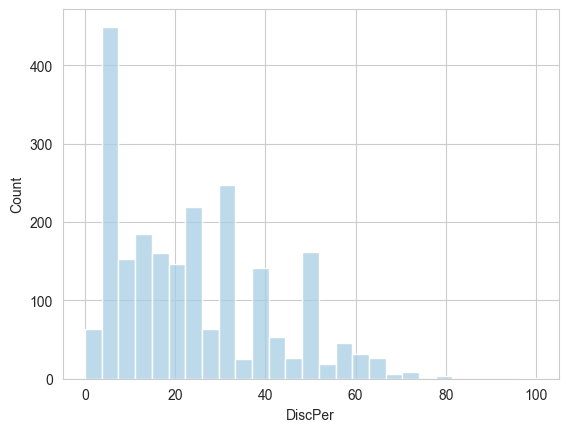

In [874]:
sns.histplot(df['DiscPer'])

Pembagian dilakukan dengan memasukkan pelanggan ke dalam kelompok tertentu berdasarkan frekuensi belanja diskon mereka. Kelompok didapatkan dari jumlah frekuensi belanja diskon yang tersedia (diskrit) dibagi tiga (QCut).

In [875]:
def discAcc(x):
    if x<=33.3 or x==0:
        return 'Low Acceptance'
    elif x>33.3 and x<66.6:
        return 'Middle Acceptance'
    else:
        return 'High Acceptance'

df['DiscAcc'] = df['DiscPer'].apply(discAcc)
df['DiscAcc'].value_counts()

DiscAcc
Low Acceptance       1470
Middle Acceptance     725
High Acceptance        38
Name: count, dtype: int64

# Analisa Pendidikan Customer

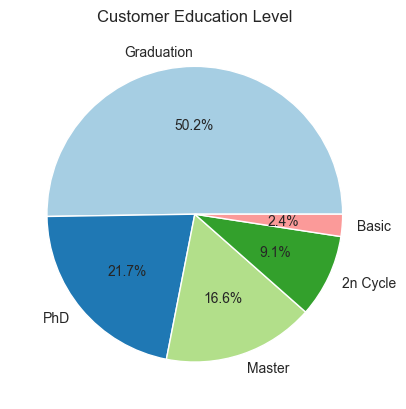

In [876]:
dfEdu = df['Education'].value_counts()
plt.pie(dfEdu, labels=dfEdu.index, autopct='%1.1f%%')
plt.title('Customer Education Level')
plt.show()

Text(0.5, 1.0, 'Customer Income per Education Level')

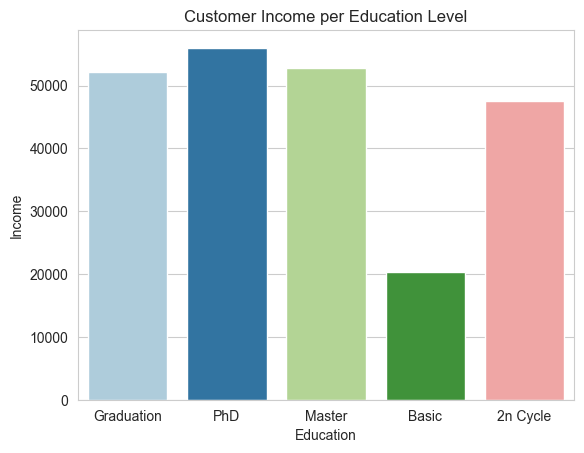

In [877]:
sns.barplot(data=df, x='Education', y='Income', ci=0)
plt.title('Customer Income per Education Level')

# Analisa Income

In [878]:
df[['Income','TotalBought','NumDealsPurchases']].corr('spearman')

,Income,TotalBought,NumDealsPurchases
Income,1.000000,0.852792,-0.191883
TotalBought,0.852792,1.000000,-0.017446
NumDealsPurchases,-0.191883,-0.017446,1.000000


Takeaways:
* Korelasi antara Income dan TotalBought adalah Strong. Artinya, semakin tinggi total gaji, semakin banyak total pengeluarannya.
* Ada korelasi negatif weak antara total deal purchase dengan income dan total bought. 

# Analisa Complain

In [879]:
dfComp = df[df['Complain']==1]

In [880]:
display(pd.DataFrame(dfComp[['ID']].count()))
display(f"Persentase pelanggan komplain: {(dfComp['ID'].count())/(df['ID'].count())*100}%")

,0
ID,21


'Persentase pelanggan komplain: 0.9404388714733543%'

Ada total 21 pelanggan, dengan jumlah persentase 0,94% yang melakukan komplain. Jumlah yang sebenarnya terlalu kecil untuk dapat dikatakan relevan.

<Axes: xlabel='DiscAcc', ylabel='count'>

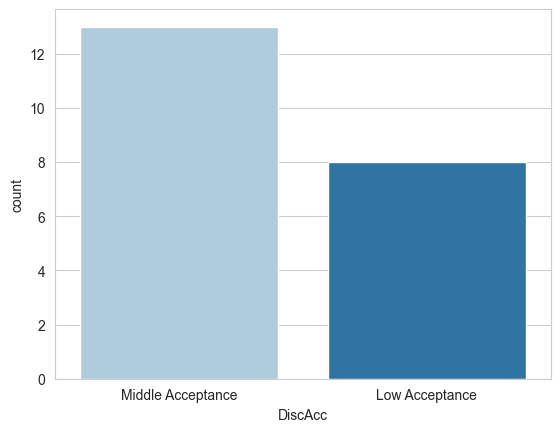

In [881]:
sns.countplot(data=dfComp,x='DiscAcc')

takeaways:
* pelanggan dalam kelompok high discount acceptance tidak ada yang melakukan komplain.

Rincian pelanggan komplain:

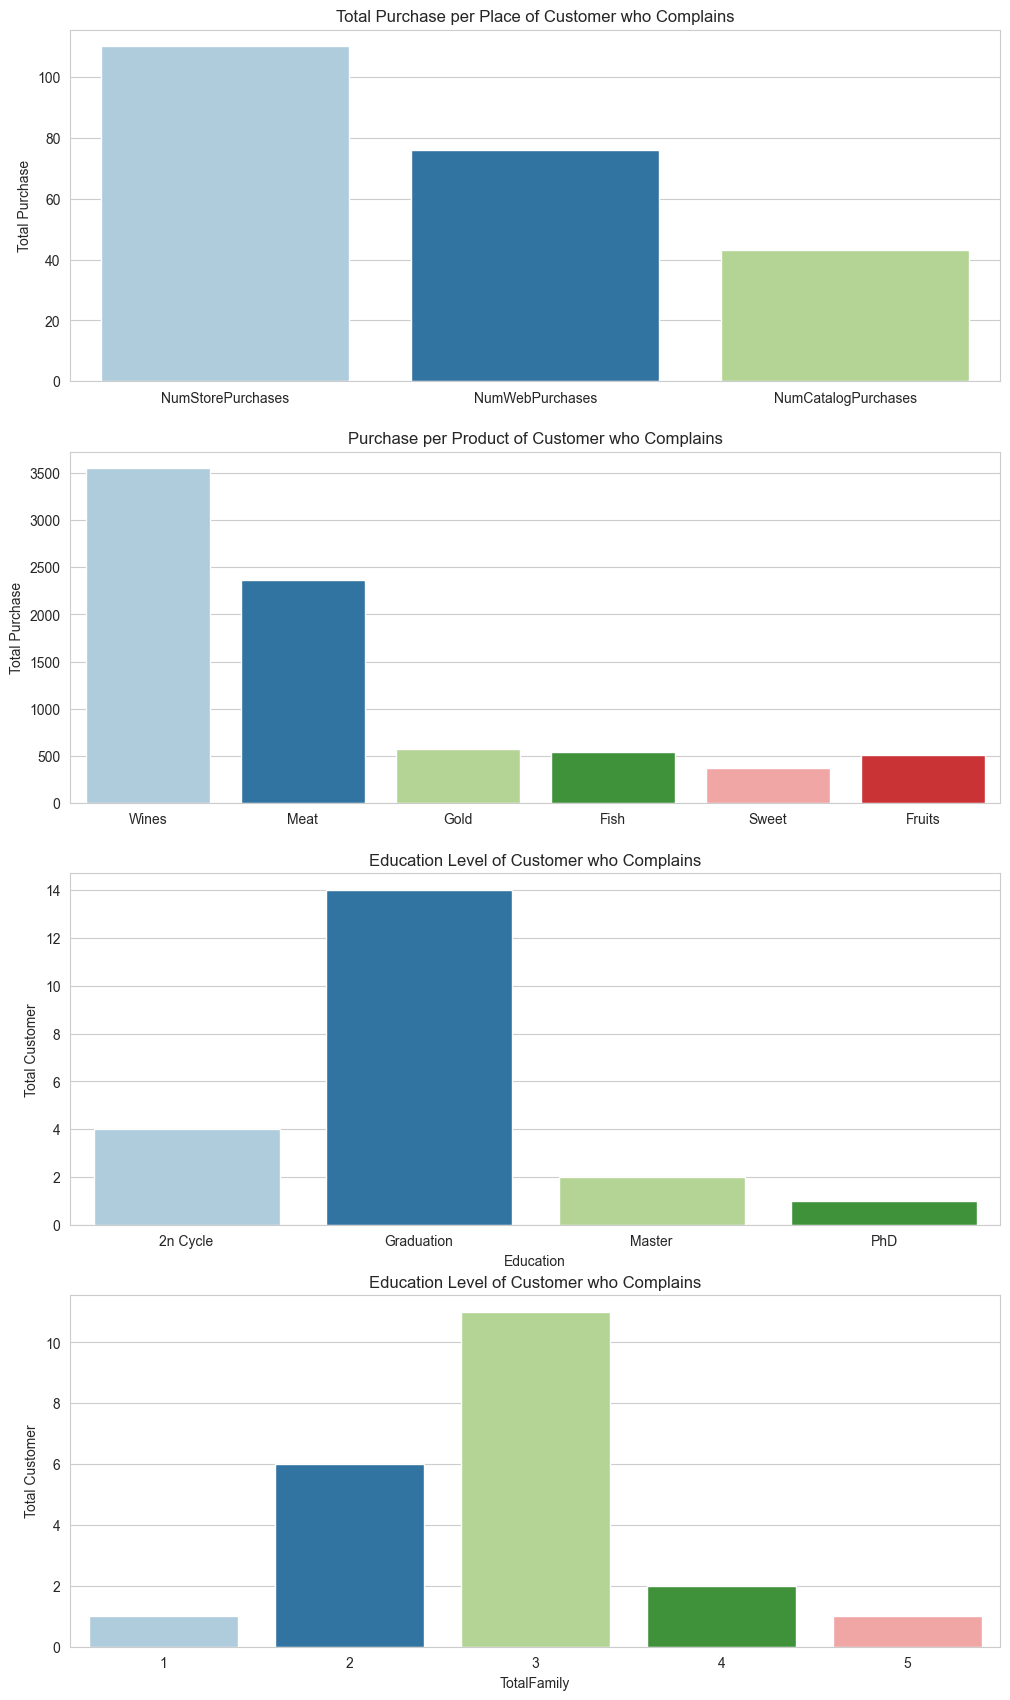

In [882]:
plt.figure(figsize=(12,21))

plt.subplot(411)
sns.barplot(data=dfComp[['NumStorePurchases','NumWebPurchases','NumCatalogPurchases']],estimator=np.sum,ci=0)
plt.ylabel('Total Purchase')
plt.title('Total Purchase per Place of Customer who Complains')

plt.subplot(412)
sns.barplot(data=dfComp[['Wines','Meat','Gold','Fish', 'Sweet','Fruits']],
            estimator=np.sum,
            ci=0)
plt.ylabel('Total Purchase')
plt.title('Purchase per Product of Customer who Complains')

plt.subplot(413)
sns.countplot(data=dfComp, x='Education')
plt.ylabel('Total Customer')
plt.title('Education Level of Customer who Complains')

plt.subplot(414)
sns.countplot(data=dfComp, x='TotalFamily')
plt.ylabel('Total Customer')
plt.title('Education Level of Customer who Complains')

plt.show()

Meskipun sebab complain tidak dapat dipinpoin secara pasti, berikut adalah takeaways yang dapat diambil: 
* Pelanggan yang melakukan komplain paling banyak melakukan transaksi di toko.
* Pelanggan yang melakukan komplain paling banyak berasal dari keluarga berjumlah total 3 orang.
* Pelanggan yang melakukan komplain paling banyak berlevel edukasi 'Graduation'.
* pelanggan yang melakukan komplain paling banyak membeli 'Wines'.

Dari poin-poin di atas dapat dibuat kesimpulan, misalnya kualitas pelayanan toko kurang baik sehingga menimbulkan komplain dari pelanggan. Kualitas wines juga mungkin kurang baik sehingga menimbulkan komplain. Tetapi karena jumlah orang yang komplain hanya 0,9% (signifikansi rendah) dan tidak ada cara untuk memverifikasi dua contoh hipotesis di atas, sebaiknya pihak supermarket menambahkan data-data berisi informasi yang berhubungan supaya dapat dilakukan analisa lanjutan.

# Analisa Korelasi antar barang 

<Axes: >

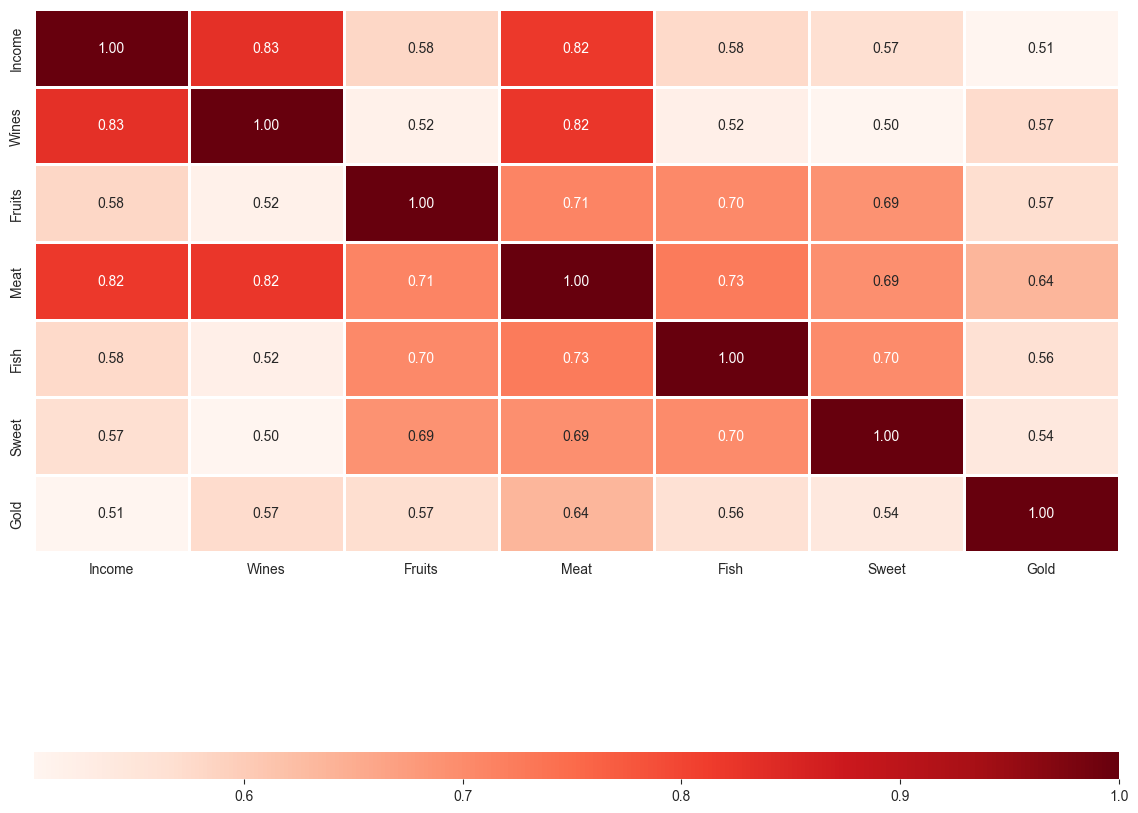

In [883]:
grid_kw = {
    'height_ratios': (20,1),        # perbandingan tinggi subplot
    'hspace': 0.7                   # jarak antar subplot
}
fig, (ax_top, ax_bottom) = plt.subplots(nrows=2, ncols=1, figsize=(14,10), gridspec_kw=grid_kw)
sns.heatmap(
    data= df[['Income', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']].corr(method='spearman'),
    ax= ax_top,                                 # axis dari heatmap
    cbar_ax= ax_bottom,                         # axis dari color bar
    cbar_kws= {'orientation':'horizontal'},     # customize color bar
    annot= True,                                # menampilkan label/anotasi
    fmt= '.2f',                                 # format anotasi 2 digit decimal
    cmap= 'Reds',                             # palette warna
    linewidths= 2,                               # border antar cell
)

Berdasarkan data di atas, dapat disimpulkan:
* Antar barang (masing-masing kombinasi) memiliki korelasi terendah 'Moderate' dan tertinggi 'Strong'. Terbukti dari nilai koefisien minimal 0,51 (MntWines & MntSweetProducts) dan maksimal 0,82 (MntWines & MntMeatProducts). 

# Specific Analysis

# Analisa Diskon

In [884]:
dfHAc = df[df['DiscAcc']=='High Acceptance']
display(dfHAc[['NumDealsPurchases','TotalBought']].corr('spearman'))
dfMAc = df[df['DiscAcc']=='Middle Acceptance']
display(dfMAc[['NumDealsPurchases','TotalBought']].corr('spearman'))
dfLAc = df[df['DiscAcc']=='Low Acceptance']
display(dfLAc[['NumDealsPurchases','TotalBought']].corr('spearman'))

,NumDealsPurchases,TotalBought
NumDealsPurchases,1.000000,0.813173
TotalBought,0.813173,1.000000


,NumDealsPurchases,TotalBought
NumDealsPurchases,1.000000,0.909955
TotalBought,0.909955,1.000000


,NumDealsPurchases,TotalBought
NumDealsPurchases,1.000000,0.002107
TotalBought,0.002107,1.000000


takeaways:
* High dan Middle discount acceptance level berkorelasi tinggi dan positif dengan total uang yang dikeluarkan kostumer.
* Hal ini berarti diskon memiliki pengaruh tinggi terhadap pola spending. Semakin sering orang belanja ketitka diskon, semakin tinggi jumlah pengeluaran.
* Secara khusus, middle acceptance level (nilai penerimaan sebesar 33%<x<66%) paling tinggi, dengan nilai korelasi 0.9.

Tapi, apakah korelasi tinggi berarti nilai spendingnya lebih banyak?

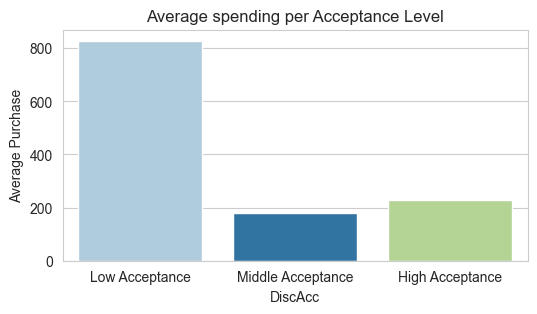

In [885]:
plt.figure(figsize=(6,3))

sns.barplot(data=df, x='DiscAcc', y='TotalBought', ci=0)
plt.ylabel('Average Purchase')
plt.title('Average spending per Acceptance Level')

plt.show()

* Berdasarkan data, tidak benar demikian adanya. Low Acceptance memiliki nilai average total spending paling tinggi. jauh mengungguli kelas acceptance lainnya.

Faktor apa yang memengaruhi?

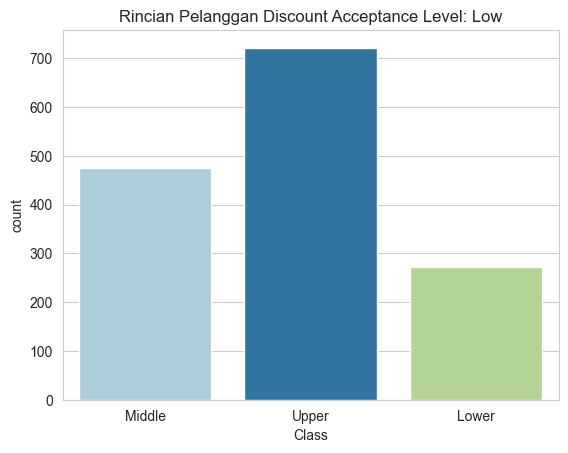

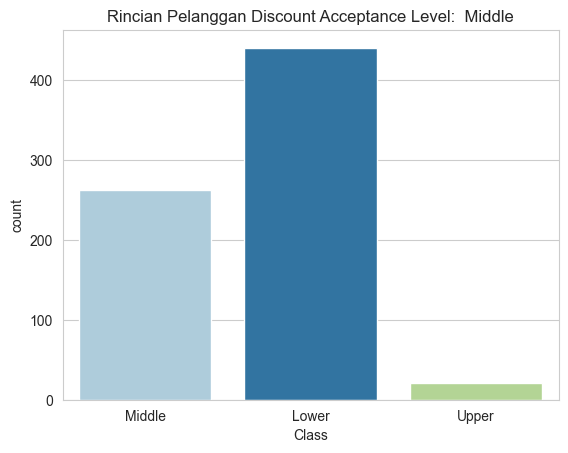

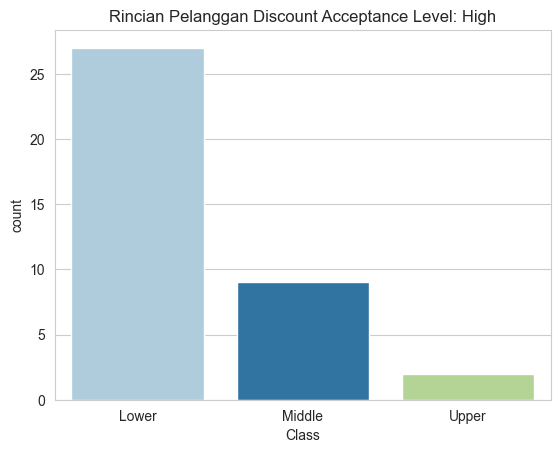

In [886]:
sns.set_palette('Paired')

sns.countplot(data=df[df['DiscAcc']=='Low Acceptance'],x='Class')
plt.title('Rincian Pelanggan Discount Acceptance Level: Low')
plt.show()

sns.countplot(data=df[df['DiscAcc']=='Middle Acceptance'],x='Class')
plt.title('Rincian Pelanggan Discount Acceptance Level:  Middle')
plt.show()

sns.countplot(data=df[df['DiscAcc']=='High Acceptance'],x='Class')
plt.title('Rincian Pelanggan Discount Acceptance Level: High')
plt.show()



Discount purchase percentage: 96.9%


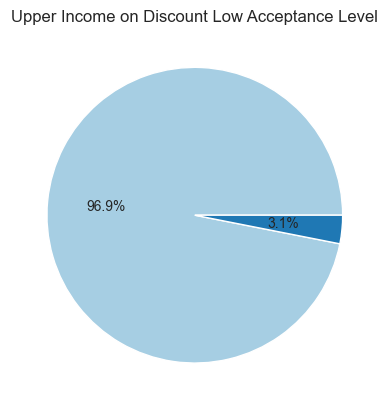

In [887]:
# Count disc purchase percentage

discPct = round(df[(df['DiscAcc']=='Low Acceptance')&(df['Class']=='Upper')]['ID'].count() / len(df[(df['Class']=='Upper')]) * 100,1)

print(f'Discount purchase percentage: {discPct}%')

pieDisc = pd.DataFrame([discPct,100-discPct])

plt.title('Upper Income on Discount Low Acceptance Level')

plt.pie(x=pieDisc[0],
        autopct=f'%1.1f%%',)
sns.set_style('whitegrid')

Takeaways: 
* kelompok lower acceptance dipenuhi pelanggan dari upper class income 
* Format Diskon yang sedang berjalan kurang menarik minat kalangan upper class income. untuk kasus ini, mungkin ada asumsi bahwa orang dengan income tinggi cenderung merasa tidak membutuhkan diskon, namun karena nilai korelasinya rendah (-0,19) bisa kita kesampingkan terlebih dahulu. 
* 97% dari Upper class berada dalam kelompok discount acceptance level low. 

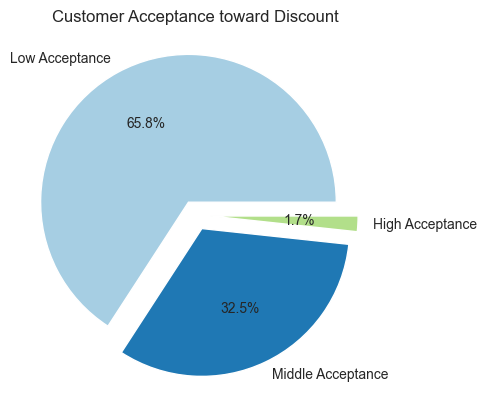

In [888]:
dfDiscou = df['DiscAcc'].value_counts()
plt.pie(dfDiscou, labels=dfDiscou.index, autopct='%1.1f%%',explode=[0.1,0.1,0.1])
plt.title('Customer Acceptance toward Discount')
plt.show()

takeaways:
* Secara umum program diskon yang berlaku kurang efektif. Kostumer dengan penerimaan rendah mendominasi dengan nilai 65.8%
* Idealnya, kelas paling banyak adalah Middle Acceptance.
* Pihak supermarket perlu menarik lebih banyak pelanggan kelas upper income ke dalam kelas middle acceptance level.

<Axes: >

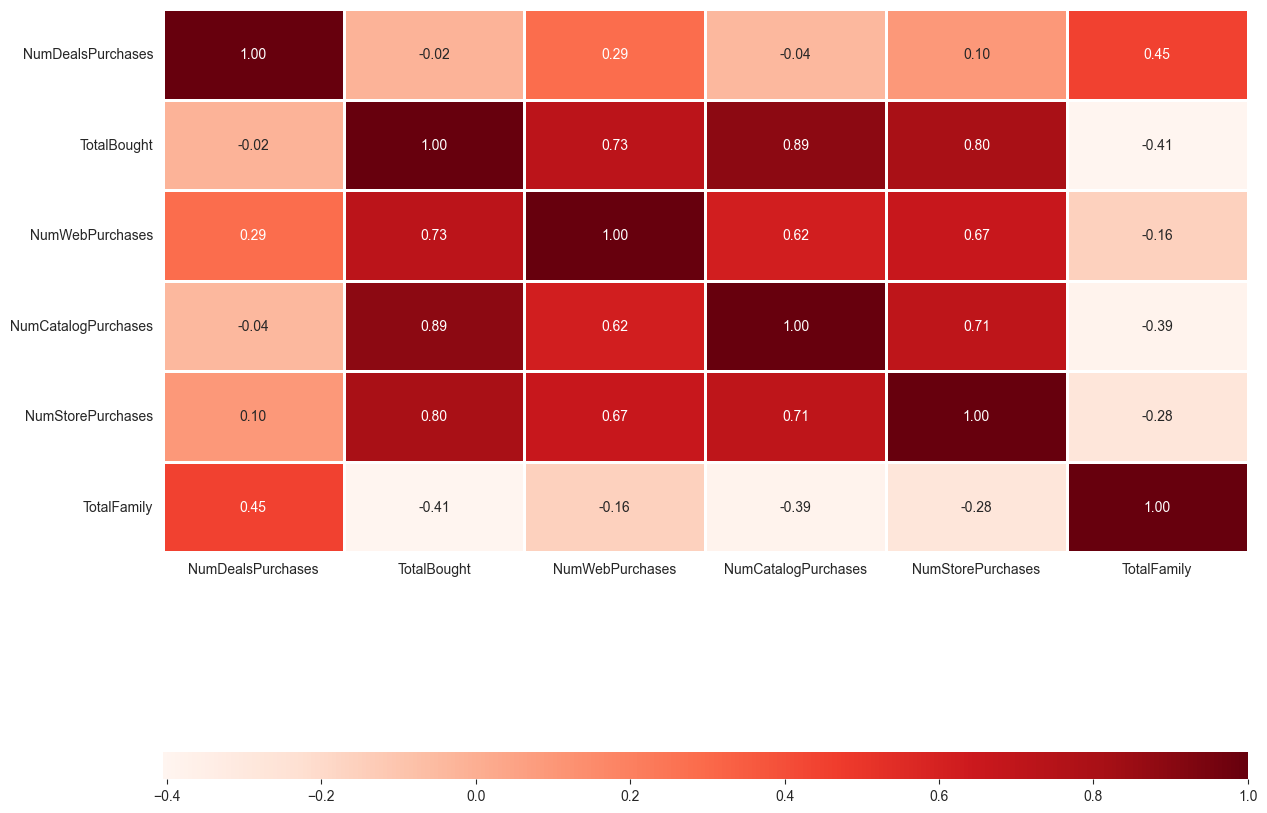

In [889]:
grid_kw = {
    'height_ratios': (20,1),        # perbandingan tinggi subplot
    'hspace': 0.7                   # jarak antar subplot
}
fig, (ax_top, ax_bottom) = plt.subplots(nrows=2, ncols=1, figsize=(14,10), gridspec_kw=grid_kw)
sns.heatmap(
    data= df[['NumDealsPurchases','TotalBought','NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases','TotalFamily']].corr(method='spearman'),
    ax= ax_top,                                 # axis dari heatmap
    cbar_ax= ax_bottom,                         # axis dari color bar
    cbar_kws= {'orientation':'horizontal'},     # customize color bar
    annot= True,                                # menampilkan label/anotasi
    fmt= '.2f',                                 # format anotasi 2 digit decimal
    cmap= 'Reds',                             # palette warna
    linewidths= 2,                               # border antar cell
)

takeaways:
* In general, jumlah pembelian lewat diskon memiliki korelasi rendah dengan pembelian via web
* Hal ini berarti penawaran diskon melalui web memiliki nilai yang bisa dipertahankan. Sementara untuk penawaran diskon di toko ataupun via katalog yang korelasinya sangat kecil (mendekati irelevan) perlu dirombak ulang.
* Korelasi sedang dengan jumlah total keluarga
* Poin di atas menunjukkan diskon yang ada kurang inklusif sehingga keluarga yang jumlahnya lebih banyak cenderung lebih sering menggunakan diskon daripada yang jumlahnya sedikit.

<Axes: xlabel='TotalFamily', ylabel='count'>

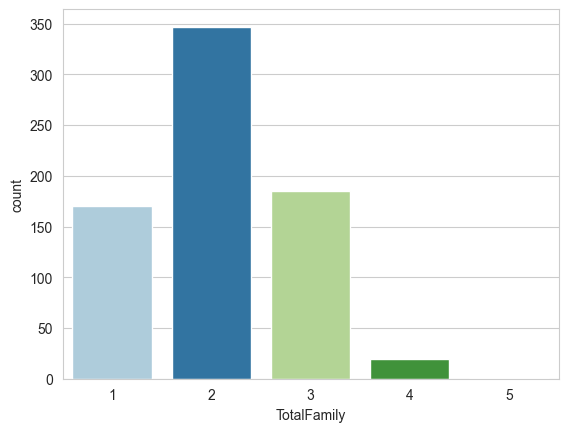

In [890]:
dfAc = df[(df['DiscAcc']=='Low Acceptance') & (df['Class']=='Upper')]
sns.countplot(data=dfAc, x='TotalFamily')

takeaway:
* Keluarga berisikan 2 orang mendominasi dibandingkan kelompok lain. dari sini dapat ditarik kesimpulan bahwa diskon yang selama ini diterapkan terlalu fokus kepada kelompok tersebut.

# Analisa Tempat Transaksi

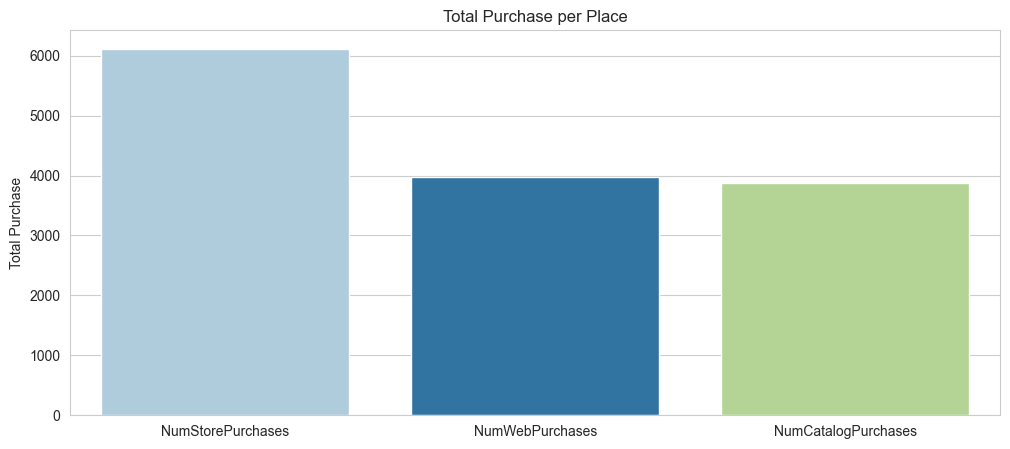

In [891]:
plt.figure(figsize=(12,5))
sns.barplot(data=df[(df['DiscAcc']=='Low Acceptance')&(df['Class']=='Upper')][['NumStorePurchases','NumWebPurchases','NumCatalogPurchases']],estimator=np.sum,ci=0)
plt.ylabel('Total Purchase')
plt.title('Total Purchase per Place')
plt.show()

takeaways:
* Meskipun sempat dibahas bahwa frekuensi belanja diskon berkorelasi paling tinggi dengan pembelian via web, tapi berdasarkan data behavioural, kelompok upper class income dan low discount acceptance paling sering belanja di store. berdasarkan analisa tersebut sebaiknya pihak swalayan memperbanyak atau memfokuskan diskon kepada diskon di store. 

# Analisa Total Family

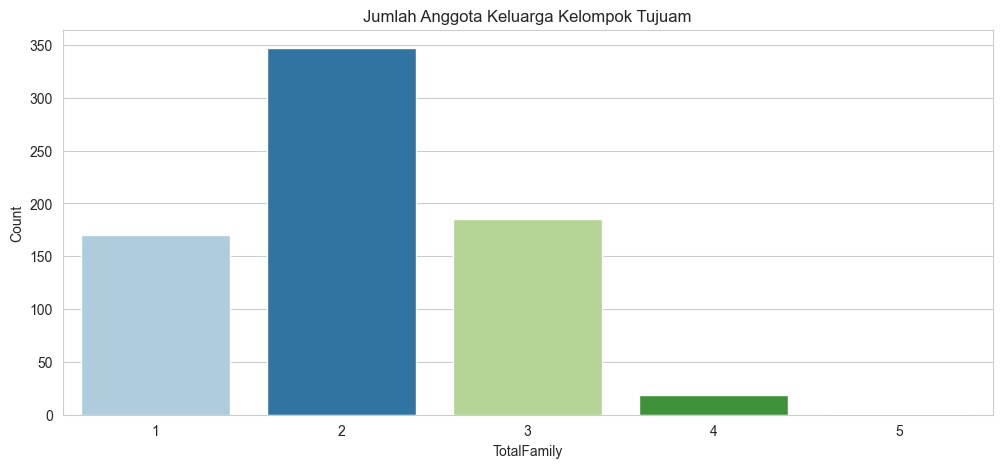

In [892]:
plt.figure(figsize=(12,5))
sns.countplot(data=df[(df['DiscAcc']=='Low Acceptance')&(df['Class']=='Upper')], x='TotalFamily')
plt.ylabel('Count')
plt.title('Jumlah Anggota Keluarga Kelompok Tujuam')
plt.show()

* Program diskon yang dibuat oleh pihak swalayan sebaiknya lebih inklusif kepada pelanggan dengan jumlah keluarga 2 dan 3 orang.

# Kombinasi barang yang disarankan

Dengan adanya paket kombo belanja, diharapkan lebih banyak pembeli dari kelas income upper pindah ke acceptance level medium. Kombinasi barang disesuaikan dengan preferensi belanja kelas income upper. 

Text(0.5, 1.0, "Upper Class Economy and Low Discount Acceptance's Favourite Item")

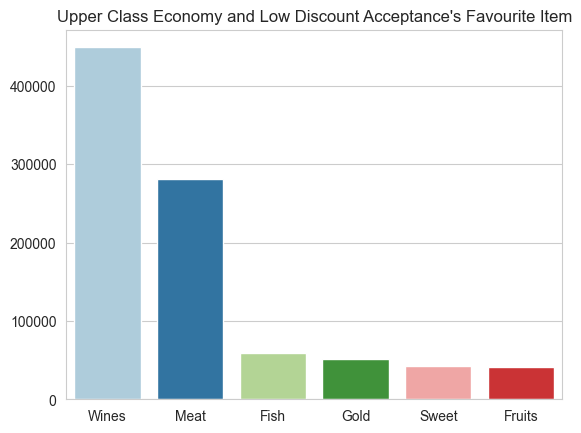

In [893]:
sns.barplot(data=df[(df['DiscAcc']=='Low Acceptance') & (df['Class']=='Upper')][['Wines', 'Meat', 'Fish', 'Gold', 'Sweet','Fruits']],estimator=np.sum,ci=0)
plt.title("Upper Class Economy and Low Discount Acceptance's Favourite Item")

Data di atas menggambarkan pola pembelian kelompok tujuan. Tanpa diskon, mereka akan membeli barang-barang tersebut. Berarti yang harus dicari adalah cara meningkatkan nilai pembelian barang-barang yang masih rendah proporsinya. Di situlah diskon memainkan perannya.

**Disclaimer: tidak bisa memberi angka pasti/konkrit karena tiada informasi tambahan.** 

Dengan tujuan menstimulasi pembelian barang-barang lain, sebaiknya ranking besaran diskon (besar ke kecil):
1. Fruits 
2. Sweet
3. Gold 
4. Fish
5. Meat
6. Wines

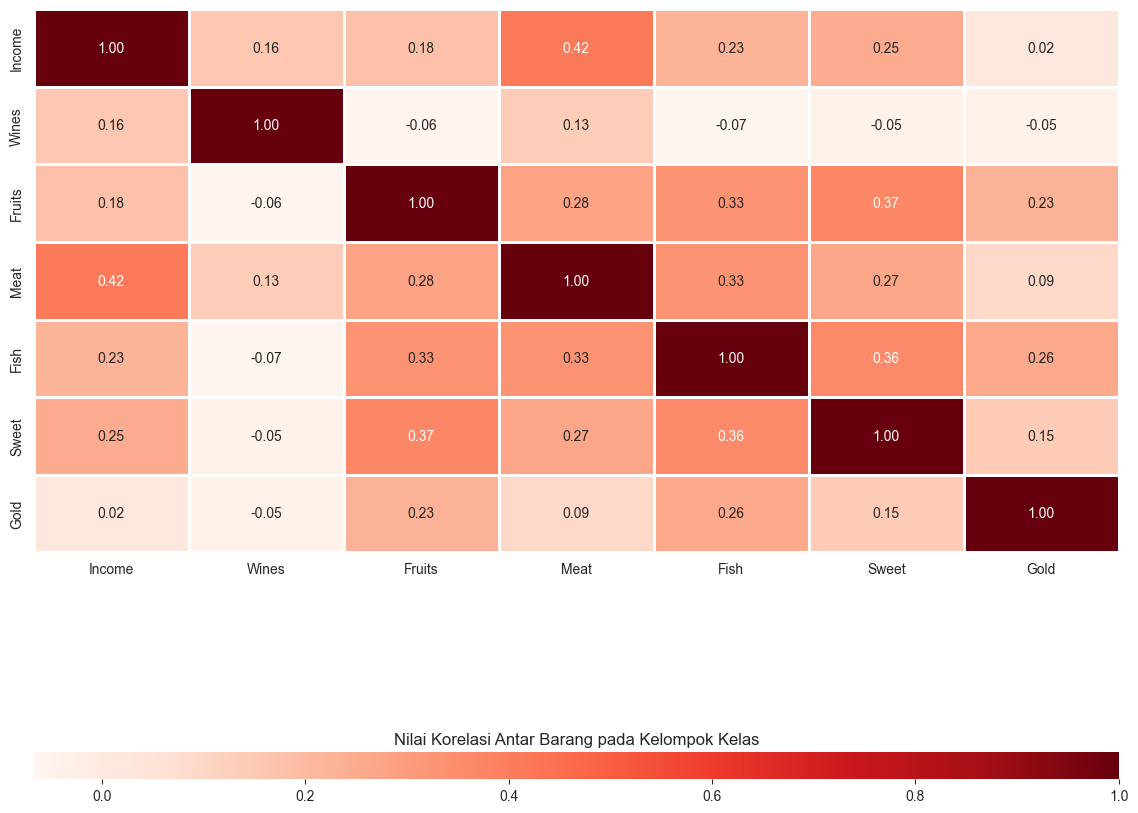

In [894]:
grid_kw = {
    'height_ratios': (20,1),        # perbandingan tinggi subplot
    'hspace': 0.7                   # jarak antar subplot
}
fig, (ax_top, ax_bottom) = plt.subplots(nrows=2, ncols=1, figsize=(14,10), gridspec_kw=grid_kw)
sns.heatmap(
    data= df[(df['DiscAcc']=='Low Acceptance') & (df['Class']=='Upper')][['Income', 'Wines', 'Fruits',
       'Meat', 'Fish', 'Sweet',
       'Gold']].corr(method='spearman'),
    ax= ax_top,                                 # axis dari heatmap
    cbar_ax= ax_bottom,                         # axis dari color bar
    cbar_kws= {'orientation':'horizontal'},     # customize color bar
    annot= True,                                # menampilkan label/anotasi
    fmt= '.2f',                                 # format anotasi 2 digit decimal
    cmap= 'Reds',                             # palette warna
    linewidths= 2,                               # border antar cell
)
plt.title('Nilai Korelasi Antar Barang pada Kelompok Kelas')
plt.show()

* Data menunjukkan pembelian wine tidak berkorelasi dengan pembelian barang apapun. Mengingat angka pembelian wine paling tinggi, dapat pula disimpulkan kelompok kelas hanya berbelanja wine di toko
* Fish memiliki average correlation paling tinggi dibandingkan barang lainnya
* Dapat juga dibuat paket diskon (barang kedua mendapat diskon tambahan apabila ada pembelian barang pertama) dengan tujuan mendongkrak korelasi antar barang secara artifisial. Korelasi antar barang yang tinggi berarti konsumen datang ke swalayan untuk membeli semua barang sekaligus.
* Ketentuan pembuatan diskon adalah sebagai berikut:
    * Diberikan kepada barang dengan korelasi ter-rendah
    * karena wine rendah terhadap semuanya, khusus wine paket barang berlaku paket diskon kepada semuanya
    * Tidak boleh ada duplikasi paket diskon
* Paket diskon sebaiknya dibuat seperti ini:
    1. Fruits - Gold
    2. Sweet - Gold
    3. Gold - Meat
    4. Fish - Gold
    5. Meat - Sweet
    6. Wines

# **Kesimpulan dan Saran**

# Kesimpulan

* High dan Middle discount acceptance level berkorelasi tinggi dan positif dengan total uang yang dikeluarkan kostumer.
* Secara khusus, middle acceptance level (nilai penerimaan sebesar 33%<x<66%) paling tinggi, dengan nilai korelasi 0.9.
* Berdasarkan data, tidak benar demikian adanya. Low Acceptance memiliki nilai average total spending paling tinggi. jauh mengungguli kelas acceptance lainnya.
* Format Diskon yang sedang berjalan kurang menarik minat kalangan upper class income. untuk kasus ini, mungkin ada asumsi bahwa orang dengan income tinggi cenderung merasa tidak membutuhkan diskon, namun karena nilai korelasinya rendah (-0,19) bisa kita kesampingkan terlebih dahulu. 
* 97% dari Upper class berada dalam kelompok discount acceptance level low. 
* Secara umum program diskon yang berlaku kurang efektif. Kostumer dengan penerimaan rendah mendominasi dengan nilai 65.8%
* Pihak supermarket perlu menarik lebih banyak pelanggan kelas upper income ke dalam kelas middle acceptance level.
* In general, jumlah pembelian lewat diskon memiliki korelasi rendah dengan pembelian via web
* Hal ini berarti penawaran diskon melalui web memiliki nilai yang bisa dipertahankan. Sementara untuk penawaran diskon di toko ataupun via katalog yang korelasinya sangat kecil (mendekati irelevan) perlu dirombak ulang.



# Saran

* Program diskon yang dibuat oleh pihak swalayan sebaiknya lebih inklusif kepada pelanggan dengan jumlah keluarga 2 dan 3 orang.
* Meskipun sempat dibahas bahwa frekuensi belanja diskon berkorelasi paling tinggi dengan pembelian via web, tapi berdasarkan data behavioural, kelompok upper class income dan low discount acceptance paling sering belanja di store. berdasarkan analisa tersebut sebaiknya pihak swalayan memperbanyak atau memfokuskan diskon kepada diskon di store. 
* Dengan tujuan menstimulasi pembelian barang-barang lain, sebaiknya ranking besaran diskon (besar ke kecil):
    1. Fruits 
    2. Sweet
    3. Gold 
    4. Fish
    5. Meat
    6. Wines
* Dapat juga dibuat paket diskon (barang kedua mendapat diskon tambahan apabila ada pembelian barang pertama) dengan tujuan mendongkrak korelasi antar barang secara artifisial. Korelasi antar barang yang tinggi berarti konsumen datang ke swalayan untuk membeli semua barang sekaligus.
* Ketentuan pembuatan diskon adalah sebagai berikut:
    * Diberikan kepada barang dengan korelasi ter-rendah
    * karena wine rendah terhadap semuanya, khusus wine paket barang berlaku paket diskon kepada semuanya
    * Tidak boleh ada duplikasi paket diskon
* Paket diskon sebaiknya dibuat seperti ini:
    1. Fruits - Gold
    2. Sweet - Gold
    3. Gold - Meat
    4. Fish - Gold
    5. Meat - Sweet
    6. Wines

# Export Table

In [895]:
df.to_csv('Supermarket_Customers_Finale.csv')